<a href="https://colab.research.google.com/github/vaibahvj50/Face-emotion-recognition/blob/main/Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/fer2013.csv')

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
pixel_data = data['pixels']
label_data = data['emotion']

In [ ]:
len(label_data)

35887

In [ ]:
def preprocess_pixels(pixel_data):
  images = []
  for i in range(len(pixel_data)):
    img = np.fromstring(pixel_data[i], dtype='int', sep=' ')
    img = img.reshape(48,48,1)
    images.append(img)

  X = np.array(images)

 

  return X

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='auto')

X_over, Y_over = oversampler.fit_resample(pixel_data.values.reshape(-1,1), label_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_over_series = pd.Series(X_over.flatten())
X_over_series

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    63 60 58 56 55 56 56 54 55 55 54 54 52 51 51 5...
62919    207 212 215 219 224 227 229 230 232 234 235 23...
62920    213 214 217 219 222 226 228 229 227 231 185 15...
62921    198 180 103 128 142 103 93 84 90 98 126 152 20...
62922    217 217 218 213 166 122 130 146 177 191 195 20...
Length: 62923, dtype: object

In [ ]:
X = preprocess_pixels(X_over_series)
Y = Y_over

In [ ]:
Y = Y_over.reshape(Y.shape[0],1)
Y.shape

(62923, 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 45)

In [ ]:
def emotion_recognition(input_shape):

  X_input = Input(input_shape)

  X = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid')(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)


  X = Conv2D(64, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)


  X = MaxPooling2D((2,2))(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

 

  X = MaxPooling2D((2,2))(X)
  X = Flatten()(X)
  X = Dense(200, activation='relu')(X)
  X = Dropout(0.6)(X)
  X = Dense(7, activation = 'softmax')(X)

  model = Model(inputs=X_input, outputs=X)

  return model

In [ ]:
model = emotion_recognition((48,48,1))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 64)        0     

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
y_train = to_categorical(Y_train, num_classes=7)

In [ ]:
y_train.shape

(56630, 7)

In [ ]:
y_test = to_categorical(Y_test, num_classes=7)

In [ ]:
model.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
1770/1770 [==============================] - 68s 12ms/step - loss: 1.8996 - accuracy: 0.2614 - val_loss: 1.3987 - val_accuracy: 0.4842
Epoch 2/30
1770/1770 [==============================] - 21s 12ms/step - loss: 1.4275 - accuracy: 0.4531 - val_loss: 1.1685 - val_accuracy: 0.5632
Epoch 3/30
1770/1770 [==============================] - 21s 12ms/step - loss: 1.2250 - accuracy: 0.5339 - val_loss: 1.0970 - val_accuracy: 0.5787
Epoch 4/30
1770/1770 [==============================] - 21s 12ms/step - loss: 1.0913 - accuracy: 0.5787 - val_loss: 0.9927 - val_accuracy: 0.6205
Epoch 5/30
1770/1770 [==============================] - 21s 12ms/step - loss: 0.9971 - accuracy: 0.6177 - val_loss: 0.9203 - val_accuracy: 0.6534
Epoch 6/30
1770/1770 [==============================] - 21s 12ms/step - loss: 0.9224 - accuracy: 0.6481 - val_loss: 0.8819 - val_accuracy: 0.6638
Epoch 7/30
1770/1770 [==============================] - 21s 12ms/step - loss: 0.8505 - accuracy: 0.6783 - val_loss: 0.8657 -

In [ ]:
model.save_weights('/content/drive/My Drive/emotion_weights_3.hdf5')

In [ ]:
model.evaluate(X_test, y_test)

197/197 [==============================] - 1s 5ms/step - loss: 0.8994 - accuracy: 0.8311


[0.8993593454360962, 0.8310821652412415]

In [ ]:
preds = model.predict(X_train)

In [ ]:
def get_class(preds):
  pred_class = np.zeros((preds.shape[0],1))

  for i in range(len(preds)):
   pred_class[i] = np.argmax(preds[i])

  return pred_class

In [ ]:
pred_class_train = get_class(preds)

In [ ]:
train_report = classification_report(Y_train, pred_class_train)

In [ ]:
print(train_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8054
           1       1.00      1.00      1.00      8094
           2       0.99      0.95      0.97      8109
           3       0.99      0.99      0.99      8083
           4       0.97      0.99      0.98      8101
           5       1.00      0.99      0.99      8120
           6       0.98      0.99      0.99      8069

    accuracy                           0.99     56630
   macro avg       0.99      0.99      0.99     56630
weighted avg       0.99      0.99      0.99     56630



In [ ]:
test_preds = model.predict(X_test)

In [ ]:
len(test_preds)

6293

In [ ]:
pred_test_class = get_class(test_preds)

In [ ]:
report_test = classification_report(Y_test, pred_test_class)

In [ ]:
print(report_test)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       935
           1       0.99      0.99      0.99       895
           2       0.86      0.75      0.80       880
           3       0.83      0.77      0.80       906
           4       0.69      0.74      0.71       888
           5       0.94      0.94      0.94       869
           6       0.76      0.76      0.76       920

    accuracy                           0.83      6293
   macro avg       0.84      0.83      0.83      6293
weighted avg       0.83      0.83      0.83      6293



In [ ]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Surprise', 4 : 'Sad', 5 : 'Happiness', 6 : 'Neutral'}
label_dict

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Surprise',
 4: 'Sad',
 5: 'Happiness',
 6: 'Neutral'}

In [ ]:
img_path = '/content/as.jpeg'
img = image.load_img(img_path, grayscale=True, target_size=(48,48))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x.shape

(1, 48, 48, 1)

The predicted emotion is : Happiness


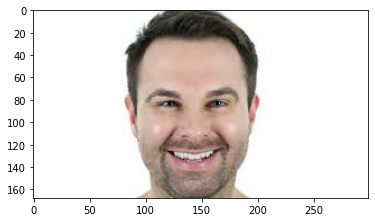

In [ ]:
prediction = np.argmax(model.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)